In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
os.chdir("/content/drive/MyDrive/Antrix ISRO")
os.listdir()

['Copy of ndvi_train.txt',
 'Copy of ndvi_train_label.txt',
 'Copy of ndvi_test.txt',
 'Copy of ndvi_test_label.txt',
 'Copy of spei_label.txt']

In [ ]:
path='/content/drive/MyDrive/Personal_upload'
os.chdir(path)

In [ ]:
print("current working directory",os.getcwd())

current working directory /content/drive/MyDrive/Personal_upload


In [ ]:
os.listdir()

['yogesh_dhyani(resume).pdf',
 'my_resume.pdf',
 'my_resume(2).pdf',
 'Record_2020-05-13-23-15-11.mp4',
 'Yogesh_resume(RSGI).pdf',
 'SPEI_ 75.750000_  14.750000.csv',
 'Presentation3.pptx',
 'Advanced-Todo-main',
 'cloud final project code (3).zip',
 'scheme-B67B.pdf',
 'Espacenet – search results.pdf',
 'Espacenet – search results_2.pdf',
 'Espacenet – search results_3.pdf',
 'Espacenet – search results4.pdf',
 'Espacenet – search results_2.gdoc',
 'Espacenet – search results4.gdoc',
 'Espacenet – search results.gdoc',
 'IP Patent Search Assignment (180030045).gdoc',
 'ndvi_train.txt',
 'ndvi_train_label.txt',
 'ndvi_test.txt',
 'ndvi_test_label.txt',
 'spei_label.txt']

In [ ]:
#ndvi train data is loaded
original_array = np.loadtxt("ndvi_train.txt").reshape(91, 256, 256)

In [ ]:
#labels of ndvi train data loaded
label_array = np.loadtxt("ndvi_train_label.txt").reshape(91, 4)

In [ ]:
#ndvi test data is loaded
test_array = np.loadtxt("ndvi_test.txt").reshape(22, 256, 256)

In [ ]:
#labels of ndvi test data is loaded
test_label_array = np.loadtxt("ndvi_test_label.txt").reshape(22, 4)

In [ ]:
label_array.shape

(91, 4)

In [ ]:
count= 0
for i in (label_array[:,2]):
  count += i
print("percentage of label 2 among all labels= ",count/91)

percentage of label 2 among all labels=  0.7032967032967034


In [ ]:
len(original_array)

91

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y), n_steps

In [ ]:
train_ndvi, pred, n_steps= split_sequence(original_array, 2)
train_ndvi_concat= [np.concatenate((train_ndvi[i][0:n_steps]),axis=1) for i in range(len(train_ndvi))]
train_ndvi_concat= np.array(train_ndvi_concat)

In [ ]:
len(train_ndvi_concat)

89

In [ ]:
test_ndvi, pred_test, n_steps= split_sequence(test_array, 2)
test_ndvi_concat= [np.concatenate((test_ndvi[i][0:n_steps]),axis=1) for i in range(len(test_ndvi))]
test_ndvi_concat= np.array(test_ndvi_concat)

In [ ]:
train_ndvi.shape

(89, 2, 256, 256)

In [ ]:
test_ndvi.shape

(20, 2, 256, 256)

In [ ]:
\pred.shape

(89, 256, 256)

#**ConvLSTM Architecture**

In [ ]:
import xgboost as XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, ConvLSTM2D, Flatten, Dropout, MaxPooling2D, TimeDistributed, Conv2D, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
steps = 2
height = 256
width = 256
input_channels = 1


In [ ]:
# model= Sequential()
with tf.device('/gpu:0'):
  inp = tf.keras.Input(shape=(steps, height, width, input_channels))
  layer1 = tf.keras.layers.ConvLSTM2D(32, kernel_size=3,activation='tanh',padding='same')(inp)
  layer2= tf.keras.layers.Dropout(0.2)(layer1)
  layer3= tf.keras.layers.Dense(16,activation='tanh')(layer2)
  layer4= tf.keras.layers.Dropout(0.2)(layer3)
  layer5= tf.keras.layers.Dense(8,activation='tanh')(layer4)
  layer6= tf.keras.layers.Dropout(0.2)(layer5)
  layer7= tf.keras.layers.Dense(4,activation='tanh')(layer6)
  layer8= tf.keras.layers.Dropout(0.2)(layer7)
  layer9= tf.keras.layers.Dense(1,activation='tanh')(layer8)
  # layer8= tf.keras.layers.Dropout(0.2)(layer7)
  layer10= tf.keras.layers.Flatten()(layer9)
  # layer10= tf.reshape(layer10,shape= tf.constant([1,layer10.shape[1],1]))
  # layer11= tf.keras.layers.MaxPool1D(pool_size=4)(layer10)
  # layer11= tf.keras.layers.Dense(1024)(layer10)
  layer11= tf.keras.layers.Dense(512)(layer10)
  layer12= tf.keras.layers.Dropout(0.2)(layer11)
  layer13= tf.keras.layers.Dense(256)(layer12)
  layer14= tf.keras.layers.Dropout(0.2)(layer13)
  layer15= tf.keras.layers.Dense(128)(layer14)
  layer16= tf.keras.layers.Dropout(0.2)(layer15)
  layer17= tf.keras.layers.Dense(64)(layer16)
  layer18= tf.keras.layers.Dropout(0.2)(layer17)
  layer19= tf.keras.layers.Dense(32)(layer18)
  output= tf.keras.layers.Dense(4,activation='softmax')(layer19)
  # opt = tf.keras.optimizers.Adam(learning_rate=0.01)
  convlstm= Model(inputs=inp, outputs=output)
  convlstm.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])

  Adaboost= AdaBoostClassifier(base_estimator= convlstm, n_estimators=400, learning_rate=1)


In [ ]:
# model= Sequential()
with tf.device('/gpu:0'):
  inp = tf.keras.Input(shape=(steps, height, width, input_channels))
  layer1 = tf.keras.layers.ConvLSTM2D(32, kernel_size=3,activation='tanh',padding='same')(inp)
  layer2= tf.keras.layers.Dropout(0.2)(layer1)
  layer3= tf.keras.layers.Dense(16,activation='tanh')(layer2)
  layer4= tf.keras.layers.Dropout(0.2)(layer3)
  # layer5= tf.keras.layers.Dense(8,activation='tanh')(layer4)
  # layer6= tf.keras.layers.Dropout(0.2)(layer5)
  # layer6= tf.keras.layers.Dense(4,activation='tanh')(layer5)
  # layer8= tf.keras.layers.Dropout(0.2)(layer7)
  # layer7= tf.keras.layers.Dense(1,activation='tanh')(layer6)
  # layer8= tf.keras.layers.Dropout(0.2)(layer7)
  layer5= tf.keras.layers.Flatten()(layer4)
  # layer10= tf.reshape(layer10,shape= tf.constant([1,layer10.shape[1],1]))
  # layer11= tf.keras.layers.MaxPool1D(pool_size=4)(layer10)
  # layer11= tf.keras.layers.Dense(1024)(layer10)
  layer6= tf.keras.layers.Dense(256)(layer5)
  # layer7= tf.keras.layers.Dropout(0.2)(layer6)
  layer7= tf.keras.layers.Dense(128)(layer6)
  layer8= tf.keras.layers.Dropout(0.2)(layer7)
  # layer15= tf.keras.layers.Dense(128)(layer14)
  # layer16= tf.keras.layers.Dropout(0.2)(layer15)
  layer9= tf.keras.layers.Dense(64)(layer8)
  # layer11= tf.keras.layers.Dropout(0.2)(layer17)
  layer10= tf.keras.layers.Dense(32)(layer9)
  output= tf.keras.layers.Dense(4,activation='softmax')(layer10)
  convlstm= Model(inputs=inp, outputs=output)
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  convlstm.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model= XGBClassifier()
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", verbose=True)

In [ ]:
layer10.shape[1]

65536

In [ ]:
convlstm.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 2, 256, 256, 1)]  0         
_________________________________________________________________
conv_lst_m2d_13 (ConvLSTM2D) (None, 256, 256, 32)      38144     
_________________________________________________________________
dropout_96 (Dropout)         (None, 256, 256, 32)      0         
_________________________________________________________________
dense_122 (Dense)            (None, 256, 256, 16)      528       
_________________________________________________________________
dropout_97 (Dropout)         (None, 256, 256, 16)      0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1048576)           0         
_________________________________________________________________
dense_123 (Dense)            (None, 256)               2684

In [ ]:
train_ndvi= train_ndvi.reshape(len(train_ndvi),steps,height,width,1)
pred= pred.reshape(len(pred),height,width,1)

In [ ]:
type(train_ndvi)

numpy.ndarray

In [ ]:
train_ndvi[:40].shape

(40, 2, 256, 256, 1)

In [ ]:
pred[:40].shape

(40, 256, 256, 1)

In [ ]:
label_train= label_array[2:]

In [ ]:
label_train.shape

(89, 4)

In [ ]:
label_train[78][1]

1.0

In [ ]:
with tf.device('/gpu:0'):
  history= Adaboost.fit(train_ndvi,label_train)

ValueError: ignored

In [ ]:
from keras import backend as K

# print(layer19.output)
inp = convlstm.input   
functors = [K.function([inp], [convlstm.layers[19].output])]    # evaluation functions)
print(functors)

[<function function.<locals>.func at 0x7fd22788e440>]


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


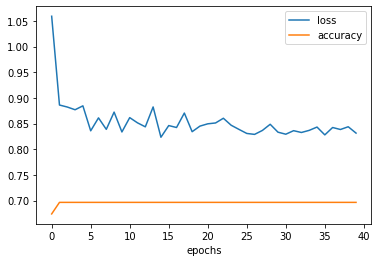

In [ ]:
#when activation function used is relu

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.legend(['loss','accuracy'])
plt.show()

In [ ]:
with tf.device('/gpu:0'):
  history= convlstm.fit(train_ndvi,label_train,epochs=30,batch_size=2)

Epoch 1/30
45/45 [==============================] - 17s 303ms/step - loss: 11.4520 - accuracy: 0.5955
Epoch 2/30
45/45 [==============================] - 14s 301ms/step - loss: 3.2728 - accuracy: 0.5281
Epoch 3/30
45/45 [==============================] - 14s 300ms/step - loss: 8.1554 - accuracy: 0.4944
Epoch 4/30
45/45 [==============================] - 13s 299ms/step - loss: 3.3058 - accuracy: 0.4944
Epoch 5/30
45/45 [==============================] - 13s 299ms/step - loss: 2.0838 - accuracy: 0.6292
Epoch 6/30
45/45 [==============================] - 14s 300ms/step - loss: 0.7707 - accuracy: 0.6966
Epoch 7/30
45/45 [==============================] - 14s 300ms/step - loss: 0.6470 - accuracy: 0.7416
Epoch 8/30
45/45 [==============================] - 14s 300ms/step - loss: 0.6047 - accuracy: 0.7753
Epoch 9/30
45/45 [==============================] - 14s 300ms/step - loss: 0.5562 - accuracy: 0.7753
Epoch 10/30
45/45 [==============================] - 13s 299ms/step - loss: 0.8745 - accur

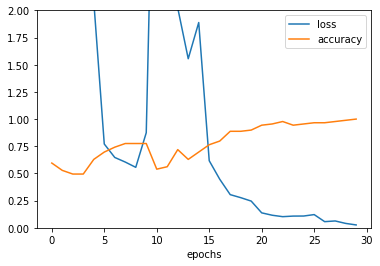

In [ ]:
#when activation function used is tanh

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylim(0, 2)
plt.xlabel('epochs')
plt.legend(['loss','accuracy'])
plt.show()

#**ConvXgb Archtecture**

In [ ]:
import xgboost as xgb

# train= xgb.DMatrix(X_train, label= label_train)

In [ ]:
param={
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 3
}

epochs= 10

In [ ]:
model= xgb.train(param, train, epochs)

In [ ]:
# model= Sequential()
with tf.device('/gpu:0'):
  inp = tf.keras.Input(shape=(steps, height, width, input_channels))
  layer1 = tf.keras.layers.Conv2D(32, kernel_size=3,activation='relu',padding='same')(inp)
  layer2= tf.keras.layers.MaxPool3D(pool_size=2,padding='same')(layer1)
  layer3 = tf.keras.layers.Conv2D(32, kernel_size=3,activation='relu',padding='same')(layer2)
  layer4= tf.keras.layers.MaxPool3D(pool_size=2,padding='same')(layer3)
  layer5= tf.keras.layers.Flatten()(layer4)
  # output= XGBClassifier()(layer5)
  convxgg= Model(inputs= inp, outputs= layer5)
  convxgg.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])

TypeError: ignored

#**CNN**

In [ ]:
height= train_ndvi_concat[0].shape[0]
width= train_ndvi_concat[0].shape[1]
input_channels= 1

In [ ]:
cnnmodel= Sequential()
cnnmodel.add(tf.keras.Input(shape=(height, width, input_channels)))
cnnmodel.add(Conv2D(64,3))
cnnmodel.add(MaxPooling2D())
cnnmodel.add(Conv2D(32,3))
cnnmodel.add(MaxPooling2D(3))
cnnmodel.add(Conv2D(16,3))
cnnmodel.add(MaxPooling2D(3))
cnnmodel.add(Flatten())
# model.add(Dense(128, activation= 'relu'))
# model.add(Dropout(0.2))
cnnmodel.add(Dense(64, activation= 'relu'))
cnnmodel.add(Dense(32, activation= 'relu'))
cnnmodel.add(Dense(16, activation='relu'))
#model.add(Dropout(.5))
cnnmodel.add(Dense(4, activation='softmax'))
cnnmodel.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnnmodel.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 254, 510, 64)      640       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 127, 255, 64)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 125, 253, 32)      18464     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 41, 84, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 39, 82, 16)        4624      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 27, 16)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 5616)            

In [ ]:
train_ndvi_concat= train_ndvi_concat.reshape(len(train_ndvi_concat),height,width,1)
# pred= pred.reshape(len(pred),height,width,1)
label_train= label_array[2:]

In [ ]:
len(label_test)

20

In [ ]:
test_ndvi_concat= test_ndvi_concat.reshape(len(test_ndvi_concat),height,width,1)
test_ndvi_concat.shape

(20, 256, 512, 1)

In [ ]:
with tf.device('/gpu:0'):
  history= cnnmodel.fit(train_ndvi_concat,label_train,epochs=30,batch_size=2)

Epoch 1/30
45/45 [==============================] - 2s 22ms/step - loss: 1.2199 - accuracy: 0.6966
Epoch 2/30
45/45 [==============================] - 1s 19ms/step - loss: 0.9699 - accuracy: 0.6966
Epoch 3/30
45/45 [==============================] - 1s 19ms/step - loss: 0.8996 - accuracy: 0.6966
Epoch 4/30
45/45 [==============================] - 1s 19ms/step - loss: 0.8592 - accuracy: 0.6966
Epoch 5/30
45/45 [==============================] - 1s 19ms/step - loss: 0.8267 - accuracy: 0.6854
Epoch 6/30
45/45 [==============================] - 1s 19ms/step - loss: 0.7269 - accuracy: 0.6629
Epoch 7/30
45/45 [==============================] - 1s 19ms/step - loss: 0.8736 - accuracy: 0.6404
Epoch 8/30
45/45 [==============================] - 1s 19ms/step - loss: 0.8262 - accuracy: 0.6966
Epoch 9/30
45/45 [==============================] - 1s 19ms/step - loss: 0.7379 - accuracy: 0.7079
Epoch 10/30
45/45 [==============================] - 1s 19ms/step - loss: 0.6574 - accuracy: 0.7079
Epoch 11/

In [ ]:
cnnmodel.evaluate(test_ndvi_concat,label_test,batch_size=2)

10/10 [==============================] - 0s 11ms/step - loss: 2.2625 - accuracy: 0.6500


[2.262456178665161, 0.6499999761581421]

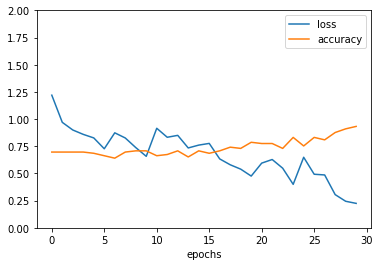

In [ ]:


plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.ylim(0, 2)
plt.xlabel('epochs')
plt.legend(['loss','accuracy'])
plt.show()

#**TimeDistributed CNN Model**

In [ ]:
steps = 2
height = 256
width = 256
input_channels = 1

In [ ]:
with tf.device('/gpu:0'):
  model = Sequential()
  # define CNN model
  # model.add(TimeDistributed(vgg, input_shape=(4, height, width, 3)))
  model.add(TimeDistributed(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(None,steps,height,width,1))))
  model.add(TimeDistributed(MaxPooling2D(pool_size=(3, 3))))
  model.add(TimeDistributed(Conv2D(16, (3,3), activation='relu')))
  model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
  model.add(TimeDistributed(Flatten()))
  # define LSTM model
  model.add(LSTM(256, activation='relu'))
  # model.add(Dense())
  # finalize with standard Dense, Dropout...
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(.5))
  model.add(Dense(4, activation='softmax'))
  model.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.build((None,steps,height,width,1)) 
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_90 (TimeDis (None, 2, 256, 256, 32)   320       
_________________________________________________________________
time_distributed_91 (TimeDis (None, 2, 85, 85, 32)     0         
_________________________________________________________________
time_distributed_92 (TimeDis (None, 2, 83, 83, 16)     4624      
_________________________________________________________________
time_distributed_93 (TimeDis (None, 2, 41, 41, 16)     0         
_________________________________________________________________
time_distributed_94 (TimeDis (None, 2, 26896)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 256)               27804672  
_________________________________________________________________
dense_44 (Dense)             (None, 64)              

In [ ]:
label_train= label_array[2:]
label_test= test_label_array[2:]

In [ ]:
label_train.shape

(89, 4)

In [ ]:
label_test.shape

(20, 4)

In [ ]:
train_ndvi= train_ndvi.reshape(89,2,256,256,1)
train_ndvi.shape

(89, 2, 256, 256, 1)

In [ ]:
test_ndvi= test_ndvi.reshape(20,2,256,256,1)
test_ndvi.shape

(20, 2, 256, 256, 1)

In [ ]:
#new one
history= model.fit(train_ndvi,label_train,batch_size=2,epochs=35)

Epoch 1/35
45/45 [==============================] - 4s 40ms/step - loss: 1.6876 - accuracy: 0.6517
Epoch 2/35
45/45 [==============================] - 2s 38ms/step - loss: 1.0364 - accuracy: 0.6854
Epoch 3/35
45/45 [==============================] - 2s 39ms/step - loss: 0.9763 - accuracy: 0.6854
Epoch 4/35
45/45 [==============================] - 2s 38ms/step - loss: 0.9124 - accuracy: 0.6517
Epoch 5/35
45/45 [==============================] - 2s 38ms/step - loss: 0.8428 - accuracy: 0.7079
Epoch 6/35
45/45 [==============================] - 2s 38ms/step - loss: 0.8082 - accuracy: 0.6742
Epoch 7/35
45/45 [==============================] - 2s 38ms/step - loss: 0.7954 - accuracy: 0.6742
Epoch 8/35
45/45 [==============================] - 2s 38ms/step - loss: 0.8465 - accuracy: 0.6854
Epoch 9/35
45/45 [==============================] - 2s 38ms/step - loss: 0.7399 - accuracy: 0.6517
Epoch 10/35
45/45 [==============================] - 2s 38ms/step - loss: 0.7647 - accuracy: 0.7191
Epoch 11/

In [ ]:
model.evaluate(test_ndvi,label_test,batch_size=2,verbose=8)

[3.038806915283203, 0.699999988079071]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


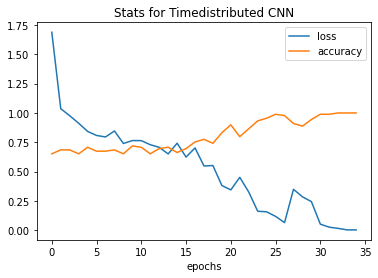

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Stats for Timedistributed CNN')
plt.xlabel('epochs')
plt.legend(['loss','accuracy'])
plt.show()

#**SPEI**

In [ ]:
df= pd.read_csv('SPEI_ 75.750000_  14.750000.csv')

In [ ]:
df.head()

,days;spei
0,1901-01-16;-0.75538
1,1901-02-15;1.3347
2,1901-03-16;0.60468
3,1901-04-16;1.5531
4,1901-05-16;0.48295


In [ ]:
# Adding two new columns to the existing dataframe.
# splitting is done on the basis of underscore.
df[['Date','SPEI']] = (df['days;spei']).str.split(";",expand=True)

In [ ]:
df.head()

,days;spei,Date,SPEI
0,1901-01-16;-0.75538,1901-01-16,-0.75538
1,1901-02-15;1.3347,1901-02-15,1.3347
2,1901-03-16;0.60468,1901-03-16,0.60468
3,1901-04-16;1.5531,1901-04-16,1.5531
4,1901-05-16;0.48295,1901-05-16,0.48295


In [ ]:
spei_label=list()
for i in range(len(df['SPEI'])):
    if float(df['SPEI'][i])>-0.5:
        spei_label.append(0)
        print('No Drought')
    elif -0.5>float(df['SPEI'][i])>-0.84:
        spei_label.append(1)
        print('Moderate Drought')
    elif -0.84>float(df['SPEI'][i])>-1.28:
        spei_label.append(2)
        print('Severe Drought')
    elif -1.28>float(df['SPEI'][i])>-1.65:
        spei_label.append(3)
        print('Extreme Drought')
    else:
        spei_label.append(4)
        print('Very Extreme Drought')

Moderate Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Moderate Drought
No Drought
No Drought
No Drought
No Drought
Extreme Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Extreme Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Severe Drought
Severe Drought
No Drought
Severe Drought
No Drought
No Drought
No Drought
No Drought
Moderate Drought
No Drought
Moderate Drought
Severe Drought
No Drought
Very Extreme Drought
No Drought
Moderate Drought
No Drought
No Drought
No Drought
No Drought
Very Extreme Drought
Severe Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Moderate Drought
No Drought
No Drought
No Drought
No Drought
No Drought
Extreme Drought
No Drought
No Drought
No Drought
No Drought
Very Extreme Droug

In [ ]:
spei_label_array= np.array(spei_label).reshape(len(spei_label),1)
spei_label_array.shape

(1416, 1)

In [ ]:
a_file = open("spei_label.txt", "w")
for row in spei_label_array:
    np.savetxt(a_file, row)

a_file.close()

In [ ]:
#labels of ndvi test data is loaded
spei_label_array = np.loadtxt("spei_label.txt")

In [ ]:
spei_label_array[:10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# check the count of label '0'
count = spei_label.count(0)
count/len(spei_label)

0.6793785310734464

In [ ]:
spei_array= np.array(df['SPEI']).reshape(-1,1)
spei_array.shape

(1416, 1)

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
spei_scaled = sc.fit_transform(spei_array)
train_spei, pred_spei, n_steps= split_sequence(spei_scaled, 4)
train_spei2, pred_spei2, n_steps2= split_sequence(df['SPEI'], 4)

In [ ]:
train_spei.shape

(1412, 4, 1)

In [ ]:
pred_spei.shape

(1412, 1)

##**SPEI Model Architecture**

###**LSTM**

In [ ]:
with tf.device('/gpu:0'):
  model= Sequential()
  model.add(LSTM(16,input_shape=(4,1)))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(4,activation='relu'))
  model.add(Dense(1,activation='tanh'))
  model.compile('adam',loss='mean_squared_error',metrics=['cosine_similarity'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1,329
Trainable params: 1,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#normalised spei values
train_spei= train_spei.reshape(len(train_spei),4,1)
pred_spei= pred_spei.reshape(len(pred_spei),1,1)


#without normalising
train_spei2= train_spei2.reshape(len(train_spei2),4,1)
pred_spei2= pred_spei2.reshape(len(pred_spei2),1,1)

In [ ]:
label_spei= to_categorical(spei_label_array)

In [ ]:
label_spei[4:].shape

(1412, 5)

In [ ]:
train_spei.shape

(1412, 4, 1)

In [ ]:
y = train_spei.astype(np.float)
y_label= pred_spei.astype(np.float)

y2 = train_spei2.astype(np.float)
y_label2= pred_spei2.astype(np.float)

In [ ]:
type(label_spei)

numpy.ndarray

In [ ]:
type(y2)

numpy.ndarray

In [ ]:
type(y_label2)

numpy.ndarray

In [ ]:
y_label2.shape

(1412, 1, 1)

In [ ]:
type(y[0][0][0])

numpy.float64

In [ ]:
type(y_label[0][0][0])

numpy.float64

In [ ]:
with tf.device('/gpu:0'):
  history= model.fit(y2,y_label2,batch_size=10,epochs=1000)

Epoch 1/1000
142/142 [==============================] - 8s 6ms/step - loss: 0.9977 - cosine_similarity: 0.0014
Epoch 2/1000
142/142 [==============================] - 1s 5ms/step - loss: 0.9944 - cosine_similarity: 0.0694
Epoch 3/1000
142/142 [==============================] - 1s 6ms/step - loss: 0.9942 - cosine_similarity: 0.0680
Epoch 4/1000
142/142 [==============================] - 1s 5ms/step - loss: 0.9932 - cosine_similarity: 0.0623
Epoch 5/1000
142/142 [==============================] - 1s 5ms/step - loss: 0.9931 - cosine_similarity: 0.0694
Epoch 6/1000
142/142 [==============================] - 1s 6ms/step - loss: 0.9932 - cosine_similarity: 0.0708
Epoch 7/1000
142/142 [==============================] - 1s 6ms/step - loss: 0.9929 - cosine_similarity: 0.0652
Epoch 8/1000
142/142 [==============================] - 1s 6ms/step - loss: 0.9923 - cosine_similarity: 0.0878
Epoch 9/1000
142/142 [==============================] - 1s 5ms/step - loss: 0.9939 - cosine_similarity: 0.0581
E

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'cosine_similarity'])


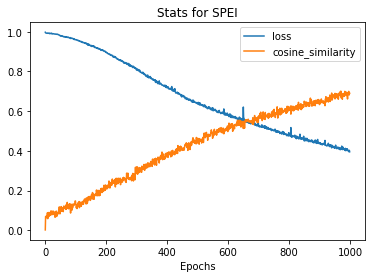

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['cosine_similarity'])
plt.title('Stats for SPEI')
plt.xlabel('Epochs')
plt.legend(['loss','cosine_similarity'])
plt.show()

In [ ]:
with tf.device('/gpu:0'):
  history= model.fit(y2,y_label2,batch_size=10,epochs=20)

Epoch 1/20
142/142 [==============================] - 3s 5ms/step - loss: 0.9979 - cosine_similarity: 0.0531
Epoch 2/20
142/142 [==============================] - 1s 5ms/step - loss: 0.9955 - cosine_similarity: 0.0538
Epoch 3/20
142/142 [==============================] - 1s 6ms/step - loss: 0.9952 - cosine_similarity: 0.0609
Epoch 4/20
142/142 [==============================] - 1s 5ms/step - loss: 0.9942 - cosine_similarity: 0.0666
Epoch 5/20
142/142 [==============================] - 1s 6ms/step - loss: 0.9941 - cosine_similarity: 0.0665
Epoch 6/20
142/142 [==============================] - 1s 5ms/step - loss: 0.9936 - cosine_similarity: 0.0779
Epoch 7/20
142/142 [==============================] - 1s 6ms/step - loss: 0.9936 - cosine_similarity: 0.0751
Epoch 8/20
142/142 [==============================] - 1s 6ms/step - loss: 0.9928 - cosine_similarity: 0.0680
Epoch 9/20
142/142 [==============================] - 1s 6ms/step - loss: 0.9923 - cosine_similarity: 0.0850
Epoch 10/20
142/142

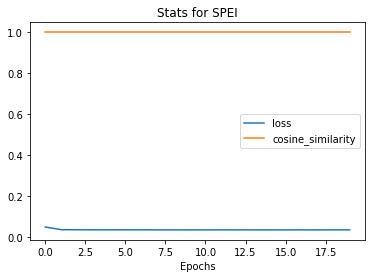

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['cosine_similarity'])
plt.title('Stats for SPEI')
plt.xlabel('Epochs')
plt.legend(['loss','cosine_similarity'])
plt.show()

###**RNN**

In [ ]:
with tf.device('/gpu:0'):
  modelrnn= Sequential()
  modelrnn.add(SimpleRNN(32,input_shape=(4,1)))
  modelrnn.add(Dense(32,activation='relu'))
  modelrnn.add(Dense(16,activation='relu'))
  modelrnn.add(Dense(8,activation='relu'))
  modelrnn.add(Dense(1,activation='tanh'))
  modelrnn.compile('adam',loss='mean_squared_error',metrics=['cosine_similarity'])

In [ ]:
with tf.device('/gpu:0'):
  history= modelrnn.fit(y2,y_label2,batch_size=10,epochs=400)

Epoch 1/400
142/142 [==============================] - 3s 9ms/step - loss: 1.0148 - cosine_similarity: -0.0496
Epoch 2/400
142/142 [==============================] - 1s 9ms/step - loss: 0.9988 - cosine_similarity: 0.0283
Epoch 3/400
142/142 [==============================] - 1s 9ms/step - loss: 0.9920 - cosine_similarity: 0.0496
Epoch 4/400
142/142 [==============================] - 1s 9ms/step - loss: 0.9906 - cosine_similarity: 0.0595
Epoch 5/400
142/142 [==============================] - 1s 9ms/step - loss: 0.9831 - cosine_similarity: 0.0836
Epoch 6/400
142/142 [==============================] - 1s 9ms/step - loss: 0.9861 - cosine_similarity: 0.0737
Epoch 7/400
142/142 [==============================] - 1s 9ms/step - loss: 0.9758 - cosine_similarity: 0.1232
Epoch 8/400
142/142 [==============================] - 1s 9ms/step - loss: 0.9769 - cosine_similarity: 0.1176
Epoch 9/400
142/142 [==============================] - 1s 9ms/step - loss: 0.9794 - cosine_similarity: 0.1119
Epoch 10/

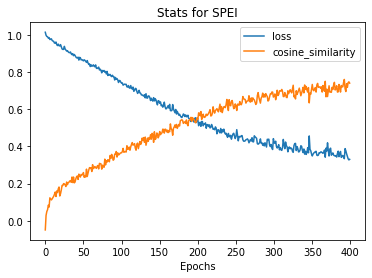

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['cosine_similarity'])
plt.title('Stats for SPEI')
plt.xlabel('Epochs')
plt.legend(['loss','cosine_similarity'])
plt.show()

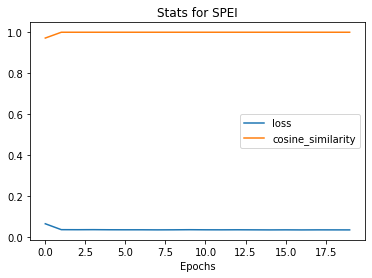

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['cosine_similarity'])
plt.title('Stats for SPEI')
plt.xlabel('Epochs')
plt.legend(['loss','cosine_similarity'])
plt.show()

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape=(4,1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['cosine_similarity'])

with tf.device('/gpu:0'):
  # history= modelrnn.fit(y,y_label,batch_size=10,epochs=400)
  history= regressor.fit(y2, y_label2, epochs = 1000, batch_size = 32)

Epoch 1/1000
45/45 [==============================] - 7s 13ms/step - loss: 0.9990 - cosine_similarity: -0.0354
Epoch 2/1000
45/45 [==============================] - 1s 12ms/step - loss: 0.9992 - cosine_similarity: -0.0028
Epoch 3/1000
45/45 [==============================] - 1s 13ms/step - loss: 0.9975 - cosine_similarity: 0.0014
Epoch 4/1000
45/45 [==============================] - 1s 13ms/step - loss: 0.9978 - cosine_similarity: 0.0510
Epoch 5/1000
45/45 [==============================] - 1s 13ms/step - loss: 0.9986 - cosine_similarity: 0.0241
Epoch 6/1000
45/45 [==============================] - 1s 12ms/step - loss: 0.9975 - cosine_similarity: 0.0397
Epoch 7/1000
45/45 [==============================] - 1s 13ms/step - loss: 0.9981 - cosine_similarity: 0.0411
Epoch 8/1000
45/45 [==============================] - 1s 13ms/step - loss: 0.9980 - cosine_similarity: 0.0368
Epoch 9/1000
45/45 [==============================] - 1s 13ms/step - loss: 0.9981 - cosine_similarity: 0.0382
Epoch 10

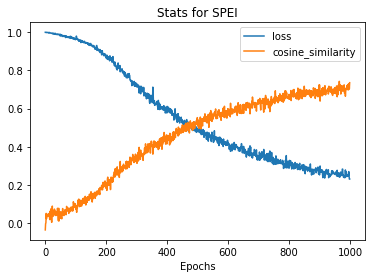

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['cosine_similarity'])
plt.title('Stats for SPEI')
plt.xlabel('Epochs')
plt.legend(['loss','cosine_similarity'])
plt.show()

In [ ]:
with tf.device('/gpu:0'):
  modelrnn= Sequential()
  modelrnn.add(SimpleRNN(32,input_shape=(4,1)))
  modelrnn.add(Dense(32,activation='relu'))
  modelrnn.add(Dense(16,activation='relu'))
  modelrnn.add(Dense(8,activation='relu'))
  modelrnn.add(Dense(5,activation='softmax'))
  # model.add(Dense(1,activation='tanh'))
  modelrnn.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
with tf.device('/gpu:0'):
  history= modelrnn.fit(y2,label_spei[4:],batch_size=10,epochs=400)

Epoch 1/400
142/142 [==============================] - 3s 10ms/step - loss: 1.2036 - accuracy: 0.6650
Epoch 2/400
142/142 [==============================] - 1s 10ms/step - loss: 1.0413 - accuracy: 0.6792
Epoch 3/400
142/142 [==============================] - 1s 10ms/step - loss: 1.0338 - accuracy: 0.6792
Epoch 4/400
142/142 [==============================] - 1s 10ms/step - loss: 1.0304 - accuracy: 0.6792
Epoch 5/400
142/142 [==============================] - 1s 10ms/step - loss: 1.0268 - accuracy: 0.6792
Epoch 6/400
142/142 [==============================] - 1s 10ms/step - loss: 1.0244 - accuracy: 0.6792
Epoch 7/400
142/142 [==============================] - 1s 10ms/step - loss: 1.0192 - accuracy: 0.6792
Epoch 8/400
142/142 [==============================] - 1s 10ms/step - loss: 1.0159 - accuracy: 0.6792
Epoch 9/400
142/142 [==============================] - 1s 10ms/step - loss: 1.0146 - accuracy: 0.6792
Epoch 10/400
142/142 [==============================] - 1s 10ms/step - loss: 1.012

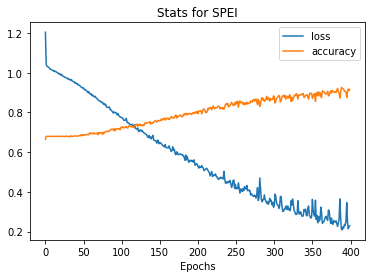

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Stats for SPEI')
plt.xlabel('Epochs')
plt.legend(['loss','accuracy'])
plt.show()

In [ ]:
with tf.device('/gpu:0'):
  modellstm= Sequential()
  modellstm.add(LSTM(32,input_shape=(4,1)))
  modellstm.add(Dense(32,activation='relu'))
  modellstm.add(Dense(16,activation='relu'))
  modellstm.add(Dense(8,activation='relu'))
  modellstm.add(Dense(5,activation='softmax'))
  # model.add(Dense(1,activation='tanh'))
  modellstm.compile('adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
with tf.device('/gpu:0'):
  history= modellstm.fit(y2,label_spei[4:],batch_size=10,epochs=400)

Epoch 1/400
142/142 [==============================] - 3s 6ms/step - loss: 1.3108 - accuracy: 0.6671
Epoch 2/400
142/142 [==============================] - 1s 6ms/step - loss: 1.0776 - accuracy: 0.6792
Epoch 3/400
142/142 [==============================] - 1s 6ms/step - loss: 1.0504 - accuracy: 0.6792
Epoch 4/400
142/142 [==============================] - 1s 6ms/step - loss: 1.0434 - accuracy: 0.6792
Epoch 5/400
142/142 [==============================] - 1s 6ms/step - loss: 1.0394 - accuracy: 0.6792
Epoch 6/400
142/142 [==============================] - 1s 6ms/step - loss: 1.0413 - accuracy: 0.6792
Epoch 7/400
142/142 [==============================] - 1s 6ms/step - loss: 1.0395 - accuracy: 0.6792
Epoch 8/400
142/142 [==============================] - 1s 6ms/step - loss: 1.0407 - accuracy: 0.6792
Epoch 9/400
142/142 [==============================] - 1s 6ms/step - loss: 1.0401 - accuracy: 0.6792
Epoch 10/400
142/142 [==============================] - 1s 6ms/step - loss: 1.0372 - accura

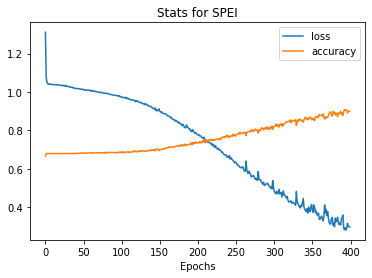

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Stats for SPEI')
plt.xlabel('Epochs')
plt.legend(['loss','accuracy'])
plt.show()